In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [13]:
last_date = dt.datetime(2017, 8, 23)
print(last_date)
first_date = last_date - dt.timedelta(days=365)
print(first_date)

2017-08-23 00:00:00
2016-08-23 00:00:00


In [20]:
###WORKSPACE FOR FILTERING AND DATAFRAME

prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()

prcp_df = pd.DataFrame.from_records(prcp, columns=['date', 'prcp']).fillna(0)
prcp_df.sort_values(by=['date'])

prcp_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


Text(0, 0.5, 'precipitation')

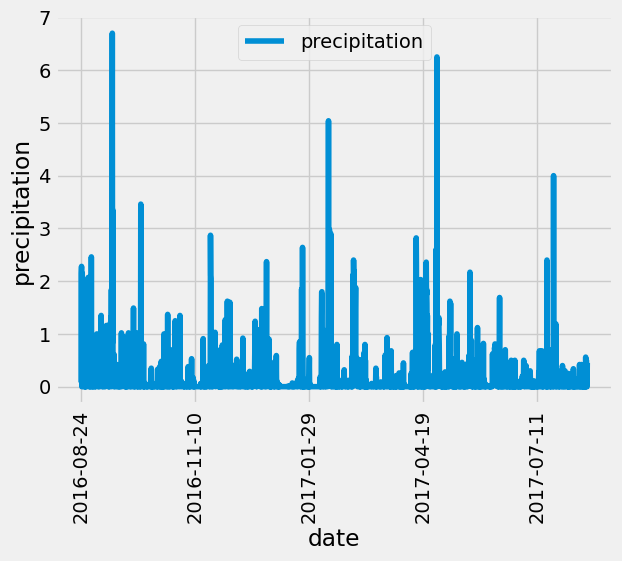

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.datetime(2017, 8, 23)
# Calculate the date one year from the last date in data set.
first_date = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precep = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= first_date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precp_df = pd.DataFrame(precep, columns = ['date', 'precipitation']).fillna(0)

# Sort the dataframe by date
precp_df = precp_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
precp_df.plot(x='date', y = 'precipitation', rot = 90)
plt.xlabel('date')
plt.ylabel('precipitation')

In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
precp_df['precipitation'].describe()

count    2230.000000
mean        0.160664
std         0.442067
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number of stations in the dataset
scount = session.query(func.count(station.station)).all()
scount

[(9,)]

In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationcounts = session.query(measurement.station, func.count(measurement.tobs))\
    .group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
stationcounts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
topstation = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
topstation

[(54.0, 85.0, 71.66378066378067)]

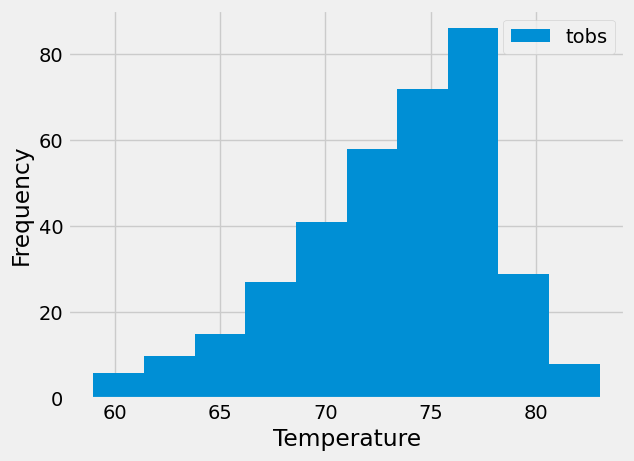

In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measurement.tobs).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.station == 'USC00519281' ).all()

temps_list = [t[0] for t in temps]

plt.hist(temps_list)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(labels = ["tobs"])

# Close Session

In [16]:
# Close Session
session.close()